# Lista 4 - Exercício 2

Considere um problema de classificação bidimensional envolvendo três classes $\omega_1, \omega_2\ \text{e}\ \omega_3$. Os exemplos da classe $\omega_1$ tem uma distribuição composta por duas Gaussianas com os parâmetros $\mu_{11}, \mu_{12}, \Sigma_{11}\ \text{e}\ \Sigma_{12}$. De forma similar, os exemplos da classe $\omega_2$ tem uma distribuição composta por duas Gaussianas com os parâmetros $\mu_{21}, \mu_{22}, \Sigma_{21}\ \text{e}\ \Sigma_{22}$. Já a classe $\omega_3$ tem uma distribuição composta por uma Gaussiana com os parâmetros $\mu_3$ e $\Sigma_3$. Os valores dos parâmetros estão representados abaixo:

$$
\begin{gather*}
\Sigma_{11} = \begin{bmatrix} 0.2 & 0 \\ 0 & 2\end{bmatrix} & \Sigma_{12} = \begin{bmatrix} 3 & 0 \\ 0 & 0.5\end{bmatrix} \\
\Sigma_{21} = \begin{bmatrix} 5 & 0 \\ 0 & 0.5\end{bmatrix} & \Sigma_{22} = \begin{bmatrix} 7 & 0 \\ 0 & 0.5\end{bmatrix} \\
\Sigma_{3} = \begin{bmatrix} 8 & 0 \\ 0 & 0.5\end{bmatrix} & \mu_{11} = [0, 3]^T \\
& \mu_{12} = [11, -2]^T \\
\mu_{21} = [3, -2]^T & \mu_{22} = [7.5, 4]^T \\
& \mu_{3} = [7, 2]^T \\
\end{gather*}
$$

**I.** Gere um conjunto de dados $X$ (treinamento) com 1000 pontos para $\omega_1$ (sendo 500 de cada distribuição), 1000 pontos para $\omega_2$ (sendo 500 de cada distribuição) e 500 pontos para $\omega_3$ (com _seed_ igual a zero). Similarmente, gere um conjunto de teste $X_{teste}$ (com _seed_ igual a 100). Plote os resultados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

N1, N2, N3 = [1000, 1000, 500]

labels = np.array([1] * N1 + [2] * N2 + [3] * N3)

N1, N2 = int(N1 / 2), int(N2 / 2)

sigma_11, sigma_12 = np.matrix([[0.2, 0], [0, 2]]), np.matrix([[3, 0], [0, 0.5]])
sigma_21, sigma_22 = np.matrix([[5, 0], [0, 0.5]]), np.matrix([[7, 0], [0, 0.5]])
sigma_3 = np.matrix([[8, 0], [0, 0.5]])

mu_11, mu_12 = np.array([0, 3]), np.array([11, -2])
mu_21, mu_22 = np.array([3, -2]), np.array([7.5, 4])
mu_3 = np.array([7, 2])

train_rnd_gen = np.random.default_rng(0)
test_rnd_gen = np.random.default_rng(100)

train = np.vstack([np.concatenate([train_rnd_gen.multivariate_normal(mu_11, sigma_11, N1),
                                  train_rnd_gen.multivariate_normal(mu_12, sigma_12, N1)]),
                   np.concatenate([train_rnd_gen.multivariate_normal(mu_21, sigma_21, N2),
                                  train_rnd_gen.multivariate_normal(mu_22, sigma_22, N2)]),
                   train_rnd_gen.multivariate_normal(mu_3, sigma_3, N3)])
test = np.vstack([np.concatenate([test_rnd_gen.multivariate_normal(mu_11, sigma_11, N1),
                                  test_rnd_gen.multivariate_normal(mu_12, sigma_12, N1)]),
                   np.concatenate([test_rnd_gen.multivariate_normal(mu_21, sigma_21, N2),
                                  test_rnd_gen.multivariate_normal(mu_22, sigma_22, N2)]),
                   test_rnd_gen.multivariate_normal(mu_3, sigma_3, N3)])

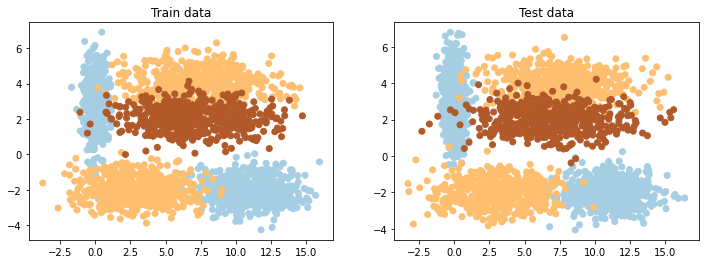

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(train[:, 0], train[:, 1], c=labels, cmap=plt.cm.Paired)
axs[0].set_title('Train data')

axs[1].scatter(test[:, 0], test[:, 1], c=labels, cmap=plt.cm.Paired)
axs[1].set_title('Test data')

plt.show(fig)

**II.** Implemente e visualize uma árvore de decisão usando o conjunto $X$.

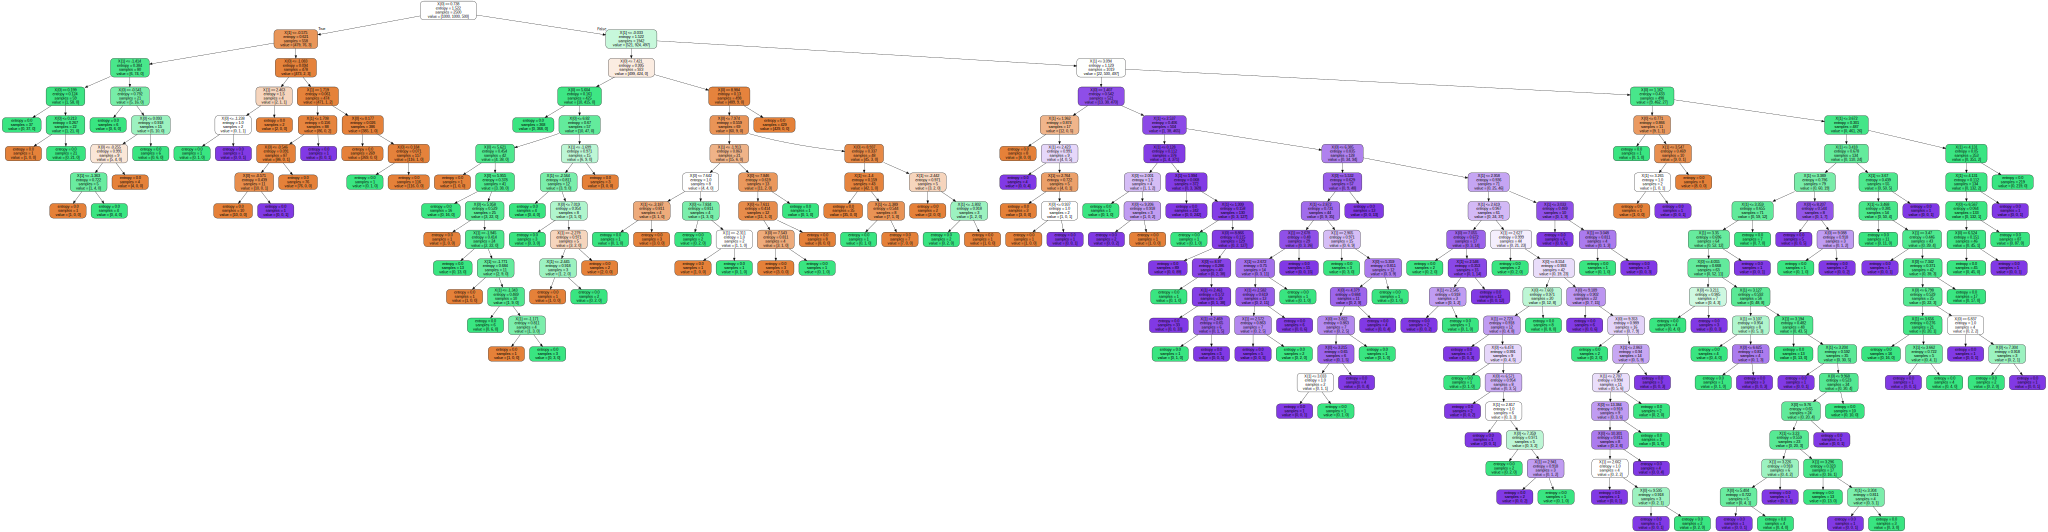

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42).fit(train, labels)
dot_data = tree.export_graphviz(clf, rounded=True, filled=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

**III.** Calcule os erros de classificação de treinamento e de teste e comente os resultados.

In [4]:
print("Erro de classificação: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf.score(train, labels), 1 - clf.score(test, labels)))

Erro de classificação: Treino - 0.0000%	Teste - 0.0680%


A árvore de decisão foi capaz de obter ótimos resultados de classificação com uma acurácia de 100% para o conjunto de treino, e um erro muito baixo para o conjunto de teste (indicando boa generalização). Porém, vale ressaltar que devido ao tamanho e complexidade da árvore gerada, é muito dificil interpretar o "raciocínio" por trás da classificação, prejudicando o processo de descoberta de conhecimento.

**IV.** Pode a árvore aos níveis 0 (sem poda), 1, ..., 11. Para cada arvore podada, calcule o erro de classificação para o conjunto de teste.

In [5]:
path = clf.cost_complexity_pruning_path(train, labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha, random_state=42).fit(train, labels)
    clfs.append(clf)
    
# Remove the trivial tree with only one node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

for i in range(12):
    print("Erro de classificação com nível de poda {} ({} nós): Teste - {:.4f}%".format(i, clfs[i].tree_.node_count, 1 - clfs[i].score(test, labels)))

Erro de classificação com nível de poda 0 (281 nós): Teste - 0.0680%
Erro de classificação com nível de poda 1 (277 nós): Teste - 0.0680%
Erro de classificação com nível de poda 2 (267 nós): Teste - 0.0664%
Erro de classificação com nível de poda 3 (263 nós): Teste - 0.0656%
Erro de classificação com nível de poda 4 (255 nós): Teste - 0.0648%
Erro de classificação com nível de poda 5 (243 nós): Teste - 0.0648%
Erro de classificação com nível de poda 6 (243 nós): Teste - 0.0648%
Erro de classificação com nível de poda 7 (243 nós): Teste - 0.0648%
Erro de classificação com nível de poda 8 (243 nós): Teste - 0.0648%
Erro de classificação com nível de poda 9 (241 nós): Teste - 0.0648%
Erro de classificação com nível de poda 10 (237 nós): Teste - 0.0652%
Erro de classificação com nível de poda 11 (233 nós): Teste - 0.0656%


**V.** Plote os erros de classificação e os níveis de poda e aponte qual o nível que retorna o melhor
desempenho de classificação. Que conclusões pode-se realizar ao se analisar esse gráfico?

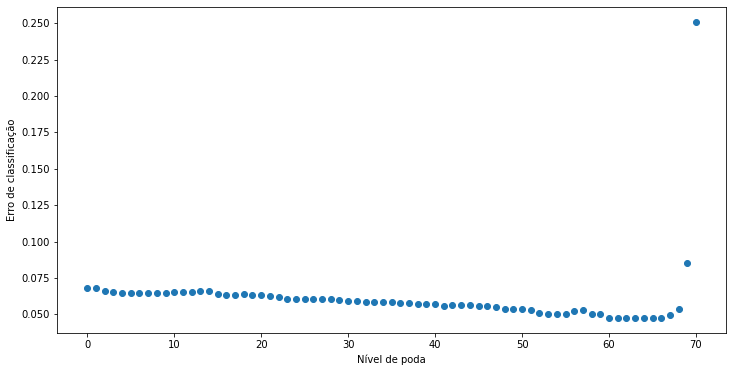

In [6]:
errors = [1 - clf.score(test, labels) for clf in clfs]

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(ccp_alphas)), errors)
plt.xlabel('Nível de poda')
plt.ylabel('Erro de classificação');

Pode-se observar no gráfico que o menor erro de classificação ocorre quando o nível de poda é 60. Podemos verificar que este é o ponto entre o _overfitting_ do classificador (nível < 60), onde o método se ajusta demais aos dados de treino produzindo árvores demasiadamente complexas e com pior generalização, e o ponto de _underfitting_, onde a árvore produzida é tão simples que não é capaz de separar as classes adequadamente.

**VI.** Visualize as árvores de decisão (a do item II e a do melhor resultado do item V).

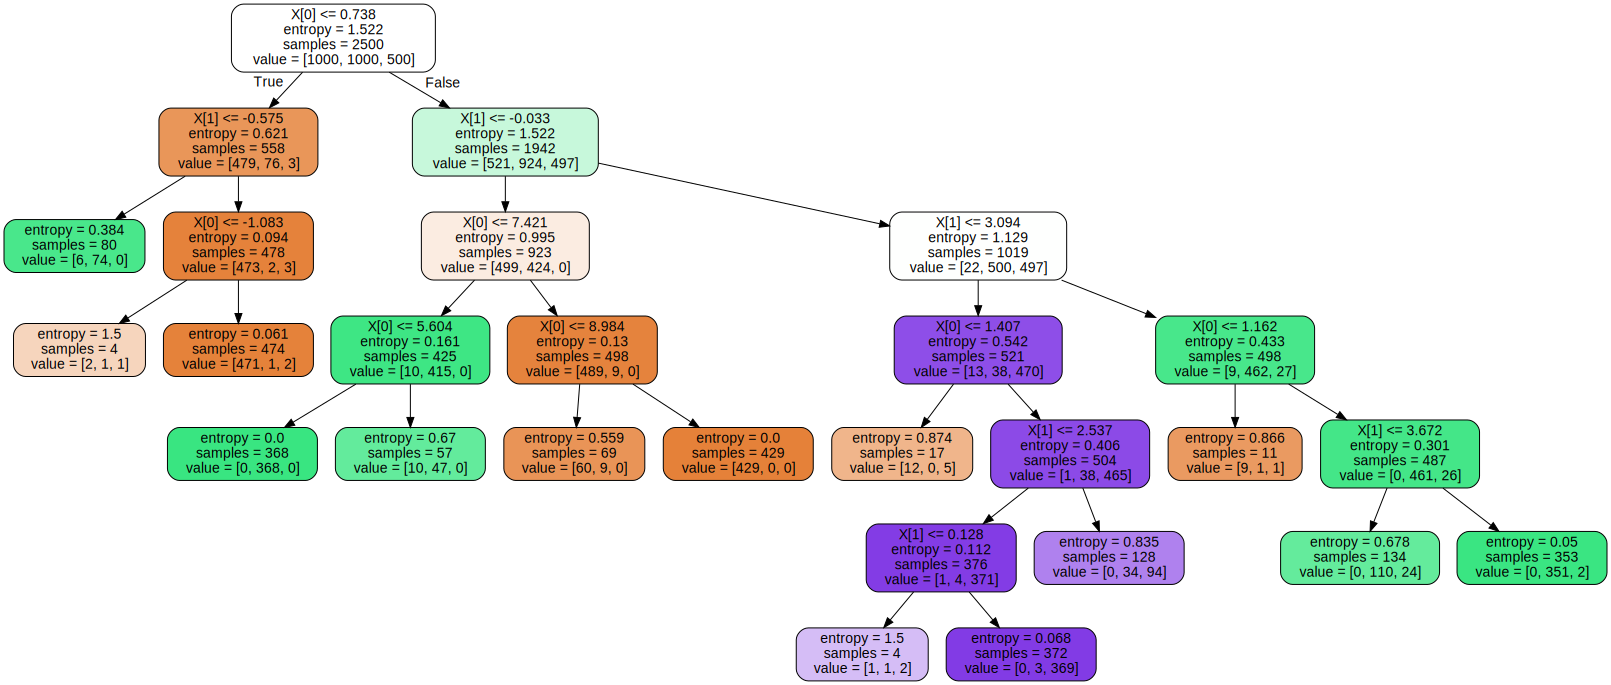

In [7]:
dot_data = tree.export_graphviz(clfs[60], rounded=True, filled=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph